<a href="https://colab.research.google.com/github/uddeshya-23/Clustering-Data-analysis/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ONLINE RETAIL DATA SET ANALYSIS

[Online retail dataset](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)



*   Read The Data
*   Visualize Data
*   Prepare Data for Modelling
*   Modelling
*   Final Analysis and Recommendation




In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [93]:
##READ THE DATASET
retail=pd.read_csv('/content/drive/MyDrive/Upgrad Data/Online+Retail.csv', sep=',',encoding='ISO-8859-1', header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [94]:
##SHAPE OF DATASET
retail.shape

(541909, 8)

In [95]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **CLEANING THE DATA**







In [96]:
## Missing Value
round(100*(retail.isnull().sum()) / len(retail), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [97]:
## Drop Missing Columns
retail=retail.dropna()

In [98]:
retail.shape

(406829, 8)

# **Prepare data for modelling**

- (R) Recency : Number of days since last purchase

- (F) Frequency : Number of transaction

- (M) Monetary : Total amount of transaction (revenue contributed)

In [99]:
## Start with Monetary the easy one  so for that we need column amount contributed by each customer

retail['amount']=retail['Quantity']*retail['UnitPrice']
retail.head()

<ipython-input-99-c26a6a9ce073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['amount']=retail['Quantity']*retail['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [100]:
##Monetary
grouped_retail=retail.groupby('CustomerID')['amount'].sum()
grouped_retail=grouped_retail.reset_index()
grouped_retail.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [101]:
##Frequency
frequency=retail.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [102]:
##MERGE BOTH "grouped_retail" &, "frequency" on "CUSTOMERID"
grouped_retail=pd.merge(grouped_retail, frequency, on='CustomerID', how='inner')
grouped_retail.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [103]:
##RECENCY
##FOR this we need to convert invoicedate into datetime object of pandas to do the arithmetic operation on datetime to get the recency

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [104]:
##Compute the max date
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [105]:
## Compute the Difference
retail['period']=max_date-retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [106]:
last_purchase=retail.groupby('CustomerID')['period'].min()
last_purchase=last_purchase.reset_index()
last_purchase.head()

,CustomerID,period
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [107]:
##MERGE BOTH "grouped_retail" , "frequency" &, "last_purchase" on "CUSTOMERID"
grouped_retail=pd.merge(grouped_retail, last_purchase, on='CustomerID', how='inner')
grouped_retail.columns=['CustomerID', 'amount', 'frequency', 'period']
grouped_retail.head()

,CustomerID,amount,frequency,period
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [108]:
## Extract Number of days only from period column
import datetime as dt
grouped_retail['period']=grouped_retail['period'].dt.days

In [109]:
grouped_retail.head()

,CustomerID,amount,frequency,period
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [110]:
## Outlier Treatment

## Scaling of data beacause in clustering we will calculate distance of two data points for each feature . for "amount" numbers will be very higher as compared to "period"  & "frequency"



{'whiskers': [<matplotlib.lines.Line2D at 0x79089f2db520>,
 'caps': [<matplotlib.lines.Line2D at 0x79089f2d9d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x79089f2d8100>],
 'medians': [<matplotlib.lines.Line2D at 0x79089f2d85b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79089f2db970>],
 'means': []}

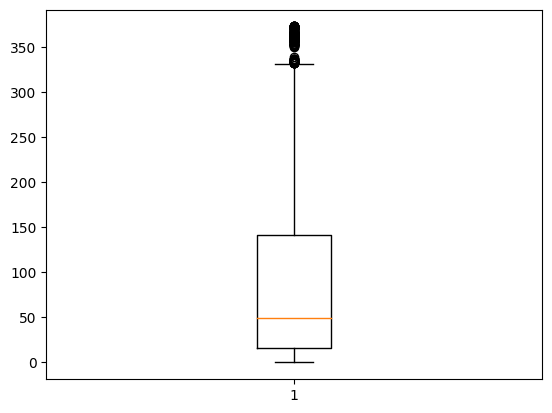

In [111]:
plt.boxplot(grouped_retail['period'])


{'whiskers': [<matplotlib.lines.Line2D at 0x79089d1d82b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79089f33f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79089d1d98d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79089d1d93f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79089d1dbca0>],
 'means': []}

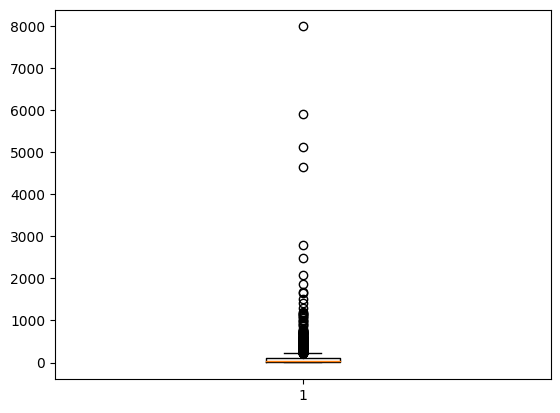

In [112]:
plt.boxplot(grouped_retail['frequency'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7908991b9360>,
 'caps': [<matplotlib.lines.Line2D at 0x7908991b98a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7908991b90c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7908991b9de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7908991ba080>],
 'means': []}

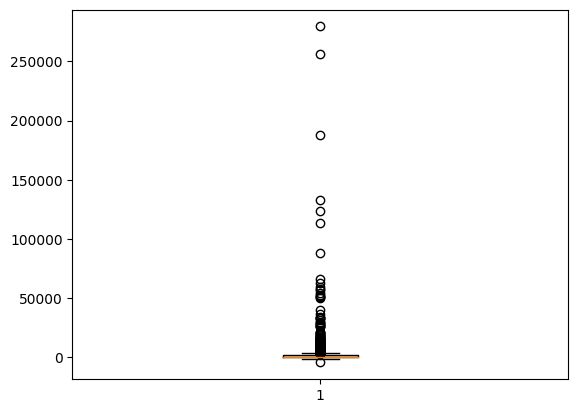

In [113]:
plt.boxplot(grouped_retail['amount'])

In [114]:
## Two type of Outlier
## 1. Domain specific

## 2. Statstical

In [121]:
## Rescaling

rfm=grouped_retail[['amount','frequency','period']]

##instantiate
scaler=StandardScaler()

##fit transform
rtm_scaled=scaler.fit_transform(rfm)
rtm_scaled.shape

(4372, 3)

In [122]:
## Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [123]:
#First convert the numpy array that you have to a dataframe
rtm_scaled = pd.DataFrame(rtm_scaled)
rtm_scaled.columns = ['amount', 'frequency', 'period']

In [125]:
hopkins(rtm_scaled)

0.9912924877742071

In [126]:
rtm_scaled.head()

,amount,frequency,period
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


# Modelling

In [131]:
##K-Means clustering
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rtm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [132]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
####### Find the SSD
ssd=[]
range_cluster=[2,3,4,5,6,7,8]

for num in range_cluster:
  kmeans=kmeans(n_cluster=num,max_iter=50)
  kmeans.fit()